In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/FBLA_Data_Analysis')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/Connecticut_Electric_Vehicle_Charging_Stations.csv')

In [ ]:
data.head()

,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [ ]:
data.dtypes

Station Name                object
Street Address              object
City                        object
Access Days Time            object
EV Level1 EVSE Num          object
EV Level2 EVSE Num          object
EV DC Fast Count            object
EV Other Info               object
New Georeferenced Column    object
dtype: object

In [ ]:
data.columns = ['station_name', 'street_address', 'city', 'access_days_time', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_count', 'ev_other_info', 'new_georeferenced_column']

In [ ]:
data['city'].value_counts()

Stamford          21
Hartford          20
Fairfield         20
New Haven         13
Danbury           12
                  ..
East Hampton       1
East Haven         1
North Canaan       1
Barkhamsted        1
North Stamford     1
Name: city, Length: 119, dtype: int64

In [ ]:
data['access_days_time'].value_counts()

24 hours daily                                                                                                                                       222
Dealership business hours                                                                                                                             26
24 hours daily; for Tesla use only                                                                                                                    19
24 hours daily; for customer use only                                                                                                                 17
24 hours daily; pay lot                                                                                                                               11
MO: Not Specified; TU: Not Specified; WE: Not Specified; TH: Not Specified; FR: Not Specified; SA: Not Specified; SU: Not Specified                    9
24 hours daily; for customer use only; see front desk for access                  

In [ ]:
data['access_days_time'][data['access_days_time'] == 'MON: 24 hours | TUE: 24 hours | WED: 24 hours | THU: 24 hours | FRI: 24 hours | SAT: 24 hours | SUN: 24 hours'] = '24 hours daily'
data['access_days_time'][data['access_days_time'] == 'MO: 12:00am-12:00am; TU: 12:00am-12:00am; WE: 12:00am-12:00am; TH: 12:00am-12:00am; FR: 12:00am-12:00am; SA: 12:00am-12:00am; SU: 12:00am-12:00am'] = '24 hours daily'

Text(0.5, 1.0, 'Top 5 Most Commmon EV Charging Conditions')

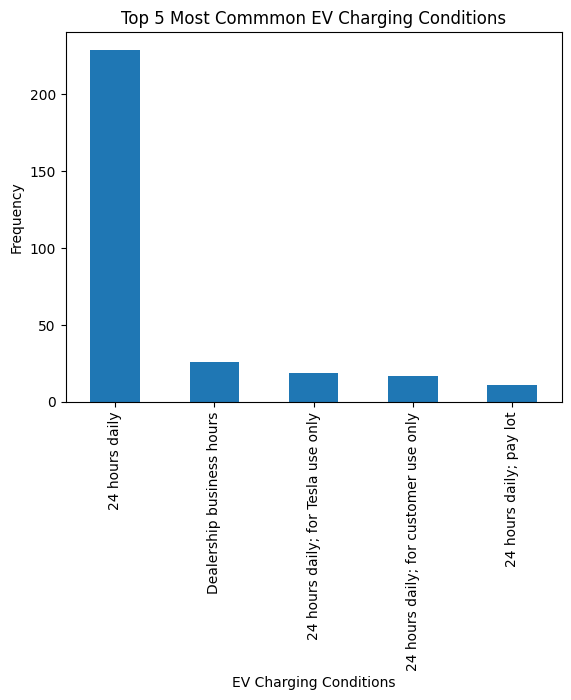

In [ ]:
brands = data['access_days_time']
frequencies = brands.value_counts().head(5)

graph = frequencies.plot(kind = 'bar')

plt.xlabel('EV Charging Conditions')
plt.ylabel('Frequency')
plt.title('Top 5 Most Commmon EV Charging Conditions')

Most of the EV chargers can be used by any EV at any time, but there are also a good amount of EV chargers that have time limits, customer restrictions, and car limits (like Tesla).

In [ ]:
data['city'].value_counts().value_counts()

1     53
2     22
3     15
8      5
6      5
5      5
4      4
20     2
9      2
21     1
13     1
12     1
11     1
10     1
7      1
Name: city, dtype: int64

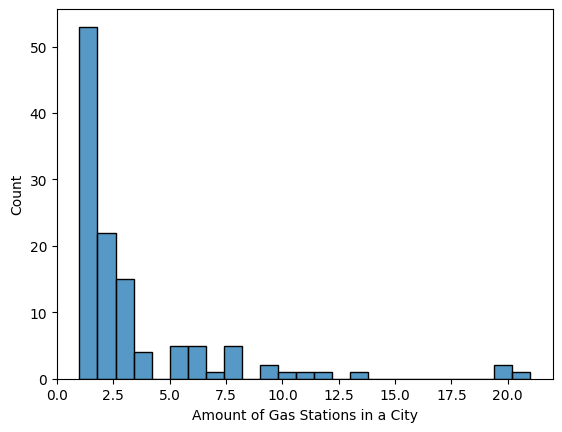

In [ ]:
sns.histplot(x=data['city'].value_counts())
plt.title('')
plt.xlabel('Amount of Gas Stations in a City')
plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/Alternative_Fueling_Stations.csv')

<ipython-input-14-d7fd2abc2d78>:1: DtypeWarning: Columns (27,32,46,51,52,53,54,55,60,62,64,66,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/Alternative_Fueling_Stations.csv')


In [ ]:
data

,X,Y,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,...,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
0,-86.267021,32.367916,1,private,NaN,NaN,NaN,2023/04/06 00:00:00+00,NaN,CNG,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,-84.367461,33.821911,2,private,NaN,GOVERNMENT,NaN,2023/12/13 00:00:00+00,NaN,CNG,...,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,-84.543822,33.760256,3,private,NaN,NaN,NaN,2023/12/13 00:00:00+00,NaN,CNG,...,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,-94.375338,35.362213,4,public,24 hours daily,CREDIT_CARD_ALWAYS,FuelMan M V Wright_Exp,2023/08/10 00:00:00+00,NaN,CNG,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,-71.026549,42.374706,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2023/09/14 00:00:00+00,NaN,CNG,...,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79908,-82.984475,42.359385,79909,public,NaN,NaN,NaN,2023/12/28 00:00:00+00,2023/12/28 00:00:00+00,ELEC,...,NaN,PRÉVU - pas encore accessible (Public),NaN,NaN,NaN,NaN,"[""601""]","[""2284_1"",""2285_1""]",-82.984475,42.359385
79909,-118.211667,33.780971,79910,public,NaN,NaN,NaN,2023/12/28 00:00:00+00,NaN,ELEC,...,NaN,Public,NaN,NaN,NaN,NaN,"[""767aa6f1-6975-43d1-bf21-a68983b80ffb""]","[""6334036a769d34776391f971""]",-118.211667,33.780971
79910,-71.489659,44.909361,79911,public,NaN,NaN,NaN,2023/12/28 00:00:00+00,2023/12/28 00:00:00+00,ELEC,...,NaN,TEMPORAIREMENT SUSPENDU (Public),NaN,NaN,NaN,NaN,"[""44154135-08d6-4efe-8a8b-518052bfab98""]","[""6423219406e494512c919d98"",""6423219406e494512...",-71.489659,44.909361
79911,-116.917950,47.713556,79912,public,NaN,NaN,NaN,2023/12/28 00:00:00+00,2023/12/28 00:00:00+00,ELEC,...,NaN,TEMPORAIREMENT SUSPENDU (Public),NaN,NaN,NaN,NaN,"[""90e17fa2-db84-4f86-978f-219e2691882b""]","[""63f4fd18627b632cabe5e57c""]",-116.917950,47.713556


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(data.dtypes)

X                             float64
Y                             float64
OBJECTID                        int64
access_code                    object
access_days_time               object
access_detail_code             object
cards_accepted                 object
date_last_confirmed            object
expected_date                  object
fuel_type_code                 object
groups_with_access_code        object
id                              int64
open_date                      object
owner_type_code                object
status_code                    object
restricted_access             float64
maximum_vehicle_class          object
station_name                   object
station_phone                  object
updated_at                     object
facility_type                  object
geocode_status                 object
city                           object
intersection_directions        object
plus4                         float64
state                          object
street_addre

In [ ]:
data.head(5)

,X,Y,OBJECTID,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,owner_type_code,status_code,restricted_access,maximum_vehicle_class,station_name,station_phone,updated_at,facility_type,geocode_status,city,intersection_directions,plus4,state,street_address,zip,country,bd_blends,cng_dispenser_num,cng_fill_type_code,cng_psi,cng_renewable_source,cng_total_compression,cng_total_storage,cng_vehicle_class,cng_has_rng,e85_blender_pump,e85_other_ethanol_blends,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,hy_is_retail,hy_pressures,hy_standards,hy_status_link,lng_renewable_source,lng_vehicle_class,lng_has_rng,lpg_primary,lpg_nozzle_types,ng_fill_type_code,ng_psi,ng_vehicle_class,rd_blends,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency_id,federal_agency_code,federal_agency_name,ev_network_ids_station,ev_network_ids_posts,longitude,latitude
0,-86.267021,32.367916,1,private,NaN,NaN,NaN,2023/04/06 00:00:00+00,NaN,CNG,Private,17,2010/12/01 00:00:00+00,T,E,NaN,MD,Spire - Montgomery Operations Center,NaN,2023/05/30 18:46:28+00,STANDALONE_STATION,200-9,Montgomery,NaN,NaN,AL,2951 Chestnut St,36107,US,NaN,NaN,B,3600,NaN,NaN,NaN,MD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-86.267021,32.367916
1,-84.367461,33.821911,2,private,NaN,GOVERNMENT,NaN,2023/12/13 00:00:00+00,NaN,CNG,Private - Government only,45,1996/12/15 00:00:00+00,LG,E,NaN,LD,Metropolitan Atlanta Rapid Transit Authority,NaN,2023/12/13 16:05:55+00,FLEET_GARAGE,200-8,Atlanta,NaN,NaN,GA,2424 Piedmont Rd NE,30324,US,NaN,NaN,Q,3000,NaN,30.0,NaN,LD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,NaN,NaN,NaN,NaN,NaN,-84.367461,33.821911
2,-84.543822,33.760256,3,private,NaN,NaN,NaN,2023/12/13 00:00:00+00,NaN,CNG,Private,64,1997/01/01 00:00:00+00,P,E,NaN,HD,United Parcel Service,NaN,2023/12/13 16:05:55+00,STANDALONE_STATION,200-9,Atlanta,NaN,NaN,GA,270 Marvin Miller Dr,30336,US,NaN,NaN,B,3600,NONE,NaN,NaN,HD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,NaN,NaN,NaN,NaN,NaN,NaN,-84.543822,33.760256
3,-94.375338,35.362213,4,public,24 hours daily,CREDIT_CARD_ALWAYS,FuelMan M V Wright_Exp,2023/08/10 00:00:00+00,NaN,CNG,Public - Credit card at all times,73,1997/01/01 00:00:00+00,T,E,0.0,MD,Arkansas Oklahoma Gas Corp,479-783-3181,2023/08/10 16:58:49+00,UTILITY,200-9,Fort Smith,NaN,NaN,AR,2100 S Waldron Rd,72903,US,NaN,1.0,Q,3600,NaN,250.0,57855.0,MD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-94.375338,35.362213
4,-71.026549,42.374706,5,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2023/09/14 00:00:00+00,NaN,CNG,Public - Credit card at all times,81,1996/11/15 00:00:00+00,SG,E,0.0,MD,Clean Energy - Logan International Airport,866-809-4869,2023/09/14 14:01:49+00,AIRPORT,GPS,East Boston,"From Route 1, take the first exit after Callah...",NaN,MA,1000 Cottage St Ext,2128,US,NaN,4.0,Q,3000 3600,NONE,850.0,NaN,MD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,NaN,NaN,NaN,NaN,NaN,-71.026549,42.374706


In [ ]:
data['city'].value_counts().value_counts()

1       3176
2       1285
3        772
4        454
5        346
6        258
7        233
8        160
10       138
9        137
12       102
11        96
13        72
14        72
15        72
17        60
16        57
18        50
22        39
19        38
20        31
26        31
21        29
25        28
30        27
24        25
29        23
23        20
32        18
34        17
27        16
33        16
31        15
35        15
40        12
39        12
37        11
28        11
36        10
42        10
50        10
62         8
46         8
48         8
51         8
45         8
43         8
47         8
52         7
49         7
77         7
61         6
54         6
67         6
41         6
38         6
53         6
58         5
56         5
66         5
60         5
74         5
73         5
63         4
94         4
65         4
82         4
44         4
75         4
68         3
121        3
93         3
87         3
135        3
98         3
99         3
170        3

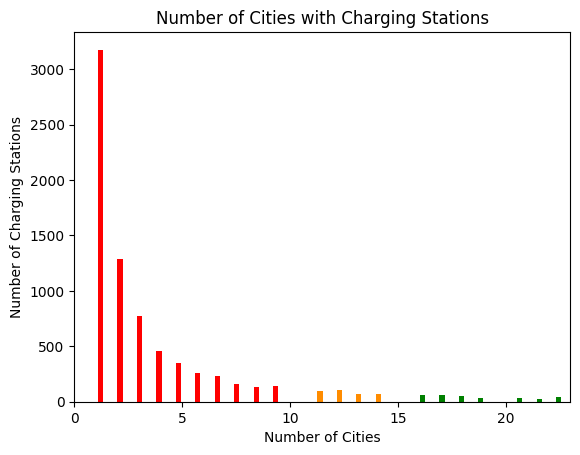

In [ ]:
optimal_d = data['city'].value_counts()[data['city'].value_counts() <= 10]
sub_optimal_d = data['city'].value_counts()[data['city'].value_counts() > 10][data['city'].value_counts() < 15]
non_optimal_d = data['city'].value_counts()[data['city'].value_counts() > 15]
plt.hist([optimal_d, sub_optimal_d, non_optimal_d], color=['red', 'darkorange', 'green'], bins = 2000)
plt.xlabel('Number of Cities')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Cities with Charging Stations')
plt.xlim(0, 23)
plt.show()

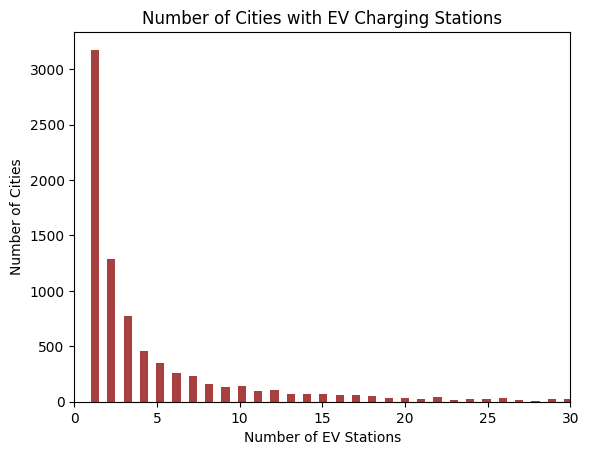

In [ ]:
sns.histplot(x=data['city'].value_counts(), color = 'darkred')
plt.title('Number of Cities with EV Charging Stations')
plt.xlabel('Number of EV Stations')
plt.ylabel('Number of Cities')
ax = plt.gca()
ax.set_xlim(left = 0, right = 30)
plt.show()

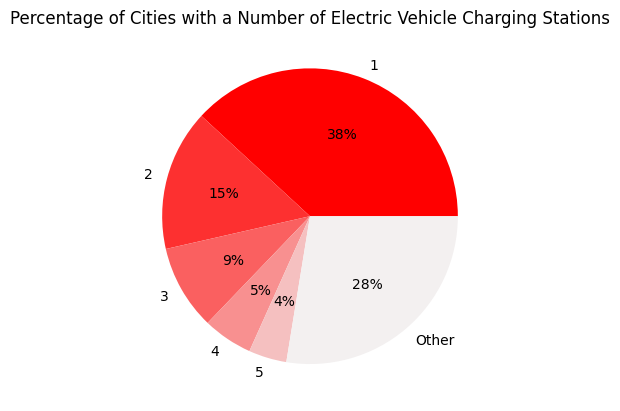

In [ ]:
city_counts = data['city'].value_counts()
city_counts_summary = city_counts.value_counts()

city_data = city_counts_summary.head(5)
city_reminiscence = city_counts_summary[5:]

palette_color = sns.color_palette("light:r_r")

combined_counts = pd.concat([city_data, pd.Series([city_reminiscence.sum()], index=['Other'])])

plt.pie(combined_counts, labels=combined_counts.index, colors=palette_color, autopct='%.0f%%')

palette_color = sns.color_palette("light:r_r")
plt.title('Percentage of Cities with a Number of Electric Vehicle Charging Stations')
plt.show()